In [15]:
import numpy as np

# Distance run in miles
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Amount of water consumed in liters
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

Text(0, 0.5, 'Water Drinks (Litre)')

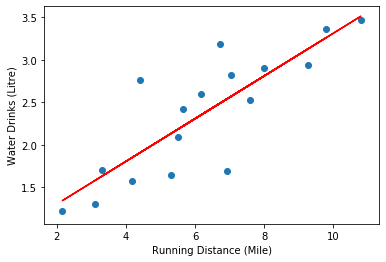

In [18]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
Y = Y.reshape(-1, 1)
X = X.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, Y) 
#training the algorithm
y_pred = regressor.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

In [4]:
# Passing 1-arrays as data is deprecated. Because of this,
# we must reshape our data using X.reshape(-1, 1) since our data has a single feature
print(X.reshape(-1, 1))


[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]
 [ 9.27 ]
 [ 3.1  ]]


In [31]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print(lr_reg.coef_)

print(lr_reg.intercept_)

[[0.25163494]]
[0.79880123]


In [32]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

In [48]:
def my_mse(true, pred):
    return (sum([(true[i] - pred[i])**2 for i in range(len(pred))]))/len(true)

In [51]:
from sklearn.metrics import mean_squared_error
new_Y = []
for i in X:
    new_Y.append(lr_reg.predict([i])[0][0])
print(my_mse(Y, new_Y))
print(mean_squared_error(Y, new_Y))

[0.15385767]
0.15385767404191095


$MSE = f(w_1, w_0)= \frac{1}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$

In [52]:
from sklearn.metrics import r2_score
print(r2_score(Y, new_Y))

0.6928760302783605


0.15385767404191164


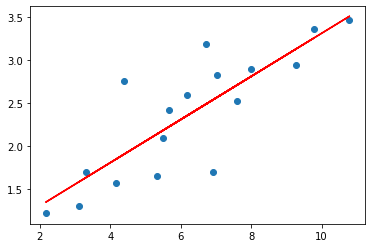

In [7]:
y_predicted = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, y_predicted ,'r')
error = sum([ (i-j)**2 for i, j in zip(Y, y_predicted) ]) / len(Y)
print(error)

In [77]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


df = pd.read_csv("Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]
X_test = df[feature_cols][150:]
Y_test = df.sales[150:]
# TODO: Instansiate the model (Linear Regression) and train it
lr_reg_ad = LinearRegression()
lr_reg_ad.fit(X_train, Y_train)
# TODO: Predict the botton 50 companies' sales
print(lr_reg_ad.coef_)
print(lr_reg_ad.intercept_)

Y_pred = lr_reg_ad.predict(X_test)
print('MSE from test data compared to prediction')
print(mean_squared_error(Y_test, Y_pred))
print('R^2 from test data compared to prediction')
print(r2_score(Y_test, Y_pred))

[ 0.04700012  0.17993257 -0.00140273]
3.029766796293691
MSE from test data compared to prediction
2.66702486838371
R^2 from test data compared to prediction
0.8963519785440216


In [78]:
lr_reg_ad.predict([[100,100,20]])

array([25.69498118])